# Part II - (Prosper Loan Dataset Explanatory Visualization)
## by (Semanyoh Nissi Kekeli)


## Investigation Overview

> The goal of the presentation is to communicate the effect of specific loan features such as original loan amount, prosper rating and term on a borrower's APR.
The key insights in this presentation are:

> 1. A distribution of borrower APR.

> 2. A distribution of original loan amount.

> 3. A plot showing the relationship between borrower APR and loan amount. 

> 4. A plot showing the relationship between APR and Prosper rating.

> 5. A plot exploring the relationship between borrower APR, prosper rating and term.


## Dataset Overview
> This data set contains 113,937 loans with 81 variables on each loan; including loan amount, borrower rate (or interest rate), current loan status, borrower income, employment status, listing category, term, prosper rating and many other variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
LoanData = pd.read_csv('prosperLoanData.csv');

# Create a subset of the dataframe with fewer variables for the investigation

LoanData_columns = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount']
LoanData = LoanData[LoanData_columns]

# Drop all rows with null values
LoanData.dropna(inplace=True)


# Convert 'ProsperRating (Alpha)' into an ordered categorical datatype from worst to best
LoanData_rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
p_rating = pd.api.types.CategoricalDtype(ordered=True, categories=LoanData_rating);
LoanData['ProsperRating (Alpha)'] = LoanData['ProsperRating (Alpha)'].astype(p_rating);

# Reset index
LoanData = LoanData.reset_index(drop=True)

# Display dataframe info
LoanData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 7 columns):
Term                     84853 non-null int64
LoanStatus               84853 non-null object
BorrowerAPR              84853 non-null float64
ProsperRating (Alpha)    84853 non-null category
EmploymentStatus         84853 non-null object
StatedMonthlyIncome      84853 non-null float64
LoanOriginalAmount       84853 non-null int64
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 4.0+ MB


## (Distribution of Borrower APR)

> The plot appears to be multimodal. Close to 0.1 there is a small peak, right on both sides of 0.2 there are two more peaks and another peak close to 0.3 mark. There is a very high peak at 0.36. The plot shows that very few Borrower APRs are more than 0.4.

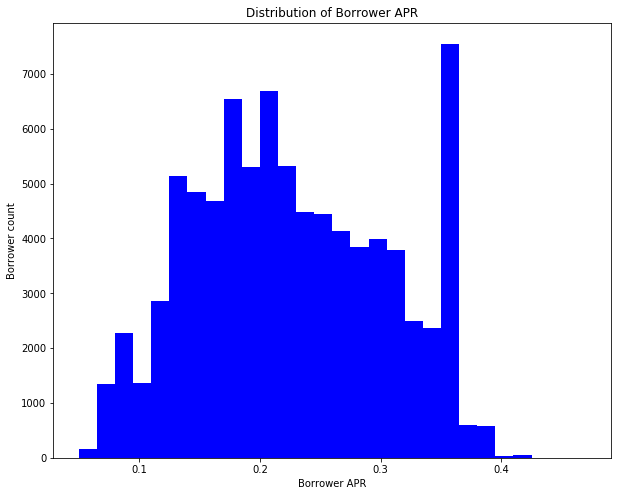

In [3]:
# Add bins to the hist plot for BorrowerAPR 
bins = np.arange(0.05, LoanData['BorrowerAPR'].max()+0.05, 0.015)
plt.figure(figsize=[10, 8])
plt.hist(data = LoanData, x = 'BorrowerAPR', bins=bins, color='blue');
plt.xlabel('Borrower APR');
plt.ylabel ('Borrower count')
plt.title('Distribution of Borrower APR');

## (Distribution of Original Loan Amount)

> The top three most common original loan amount is 4000,  followed by 15000, then 10000.  The highest loan amount is 35000 and the lowest is 1000;  both of which are the least frequent amounts. We can see that more than half of the original loan amounts are 10000 and below.

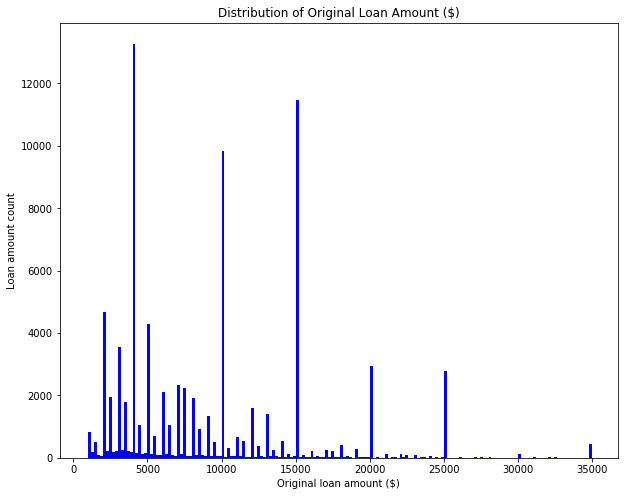

In [4]:
bins = np.arange(800, LoanData.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 8])
plt.hist(data = LoanData, x = 'LoanOriginalAmount', bins = bins, color='blue');
plt.xlabel('Original loan amount ($)');
plt.ylabel ('Loan amount count');
plt.title('Distribution of Original Loan Amount ($)');


## (Relationship between Borrower APR and Loan Amount)

> Loan amounts between 30000 and 35000 have an APR between the range of 0.10 and 0.20. As the loan amount increases the borrower APR range becomes smaller.Loan amounts between 30000 and 35000 have an APR between the range of 0.10 and 0.20.

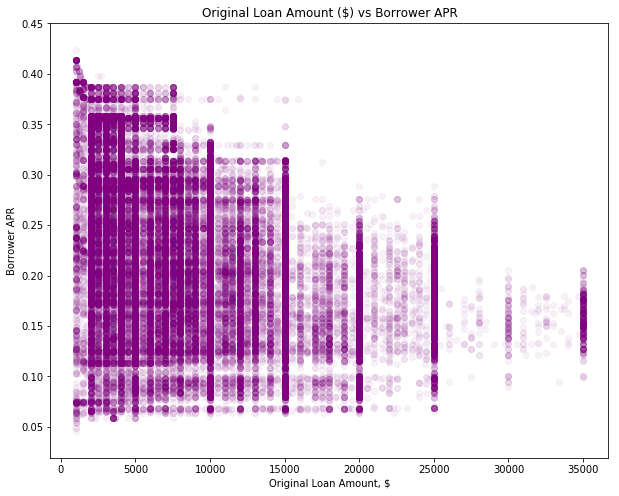

In [5]:
# Scatter plot of Borrower APR against Original Loan Amount
plt.figure(figsize=[10,8]);
plt.scatter(data=LoanData, y='BorrowerAPR', x='LoanOriginalAmount', alpha=1/20, color = 'purple');
plt.ylabel('Borrower APR');
plt.xlabel('Original Loan Amount, $');
plt.title('Original Loan Amount ($) vs Borrower APR');

## (Effect of Term on relationship between Prosper Rating and Borrower APR)

> We observe that the borrower APR decreases with the increasing loan term for borrowers with HR to C ratings. However, for people with B to AA ratings, the borrower APR increases with increasing loan term.

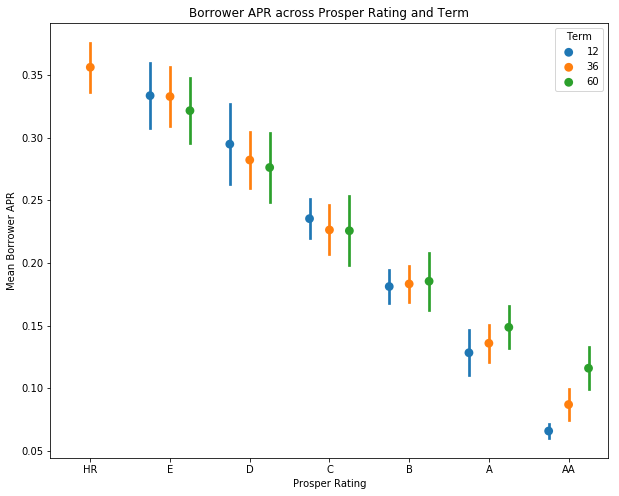

In [6]:
# Explore the relationship between borrower APR, Term and Prosper Rating
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = LoanData, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', ci='sd', linestyles = '', dodge = 0.5);
plt.title('Borrower APR across Prosper Rating and Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

## (Relationship between Borrower APR and Prosper Rating)

> There is a strong correlation between Prosper rating and Borrower APR. The better the Prosper rating, the lower the APR. The median APR for Borrower's with Prosper rating AA is 0.10, although there are some outliers. Overall, the median APR decreases with respect to Prosper Rating from the worst HR to the best rating AA.  The maximum and minimum values keep increasing from AA (best rating) upwards.

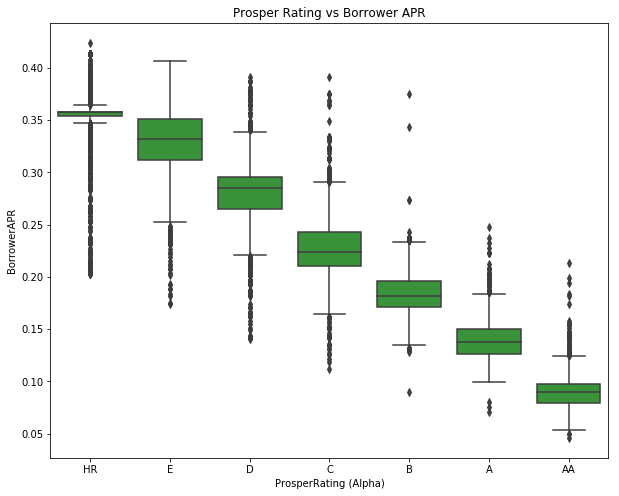

In [7]:
# Boxplot of Prosper rating against Borrower APR
plt.figure(figsize=[10,8]);
base_color=sb.color_palette()[2]
sb.boxplot(data=LoanData, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color);
plt.title('Prosper Rating vs Borrower APR');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 621312 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/